**Exploring the Dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

Using TensorFlow backend.


In [3]:
data =[]
labels = []
classes = 43
cur_path = os.getcwd()
for i in range(classes):
    path = os.path.join(cur_path,'traffic_lights_cnn_data','train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading Image")
data = np.array(data)
labels = np.array(labels)

*splitting data to train and test*

In [7]:
print(data.shape, labels.shape)

X_train,X_test,Y_train,Y_test = train_test_split(data,labels,test_size = 0.2,random_state = 43)

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

Y_train = to_categorical(Y_train,43)
Y_test = to_categorical(Y_test,43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


**Building our Model**

In [10]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),activation = 'relu',input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32,kernel_size=(5,5),activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'relu'))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(43,activation = 'softmax'))



In [13]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])

**Fitting the Model on our data**

In [14]:
epochs = 15
history = model.fit(X_train,Y_train ,batch_size = 64,epochs= epochs,validation_data = (X_test,Y_test))


Instructions for updating:
Use tf.cast instead.
Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 164s 5ms/step - loss: 2.3824 - acc: 0.4150 - val_loss: 0.8620 - val_acc: 0.7740
Epoch 2/15
31367/31367 [==============================] - 161s 5ms/step - loss: 0.9609 - acc: 0.7185 - val_loss: 0.4407 - val_acc: 0.8792
Epoch 3/15
31367/31367 [==============================] - 160s 5ms/step - loss: 0.6220 - acc: 0.8106 - val_loss: 0.3465 - val_acc: 0.9053
Epoch 4/15
31367/31367 [==============================] - 159s 5ms/step - loss: 0.4377 - acc: 0.8671 - val_loss: 0.2160 - val_acc: 0.9397
Epoch 5/15
31367/31367 [==============================] - 155s 5ms/step - loss: 0.3477 - acc: 0.8947 - val_loss: 0.1750 - val_acc: 0.9477
Epoch 6/15
31367/31367 [==============================] - 159s 5ms/step - loss: 0.2943 - acc: 0.9123 - val_loss: 0.1401 - val_acc: 0.9601
Epoch 7/15
31367/31367 [==============================] - 157s 5ms/step - l

**Visualising the accuracy and loss**

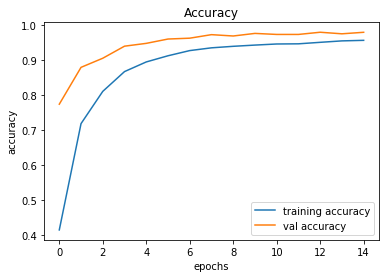

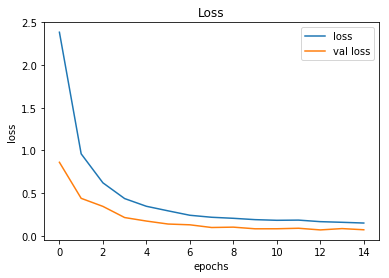

In [26]:
plt.figure(0)
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'],label = 'val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_loss'],label = 'val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()


**Testing it on test data**

In [30]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('traffic_lights_cnn_data/Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]
for img in imgs:
    img =  'traffic_lights_cnn_data/' + img
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
pred = model.predict_classes(X_test)
#Accuracy with the test data
print(accuracy_score(labels, pred))

0.9553444180522566


**Saving the model**

In [31]:
model.save('traffic_classifier.h5')